Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64,Float64,Float64,Int64
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:15
└ @ Core ./string:15


,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-186.958,-196.59,4.67294e-53
2,140.151,4.0,-184.477,-194.094,5.6661e-52
3,140.302,4.0,-182.024,-191.627,6.67753e-51
4,140.452,4.0,-179.6,-189.189,7.64866e-50
5,140.603,4.0,-177.204,-186.779,8.51515e-49
6,140.754,4.0,-174.837,-184.398,9.21377e-48
7,140.905,4.0,-172.498,-182.045,9.68991e-47
8,141.055,4.0,-170.187,-179.72,9.90467e-46
9,141.206,4.0,-167.905,-177.424,9.84007e-45


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:1
└ @ Core string:1


,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,153.568,7.61809,-67.6291,-76.202,0.898016
2,149.196,8.1005,-70.3363,-79.2001,0.0447946
3,152.965,6.97487,-67.5256,-76.1358,0.959452
4,153.719,6.33166,-67.8275,-76.3912,0.743205
5,151.91,7.05528,-67.8624,-76.5399,0.640473
6,154.02,8.0201,-67.8909,-76.4364,0.710355
7,153.719,6.33166,-67.8275,-76.3912,0.743205
8,153.568,6.41206,-67.7379,-76.3108,0.805409
9,155.075,9.54774,-69.3626,-77.8462,0.173456


### Snippet 4.23

Density of sigma

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:1
└ @ Core string:1


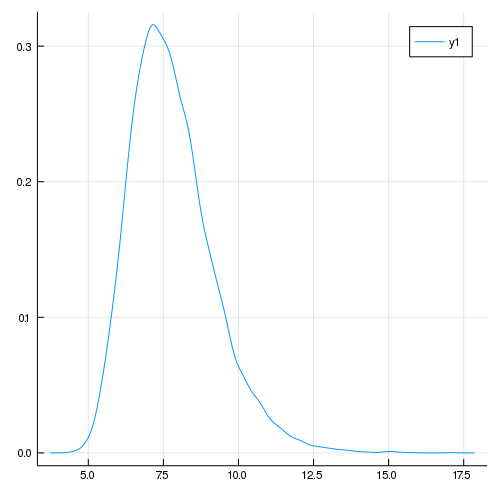

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*